## Question 1.a)
Download the housing price data set of Windsor City of Canada ( provided on my website link). Design a housing price predictor taking only floor area (plot size), number of bedrooms, and number of bathrooms into considerations. Out of total 546 data , you may take 70% for designing the predictor and 30% for validating the design. The predictor design should be done using the following methods:

<b>a) Normal equations  with  and without regularization and compare their performances in terms of % error in prediction. ( only allowed to use NumPy library of Python.no other functions/libraries are allowed )<b>


In [2]:
#Loading numpy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading Data from Housing Price data set.csv
read_data = np.genfromtxt("Housing Price data set.csv",delimiter=',')
data = np.array(read_data[1:,1:5],dtype=np.int)

**Splitting data into x and y** \
 y = Price as label \
 x = (floor Area, number of bedrooms, number of bathrooms) i.e x1,x2,x3

In [4]:
np.random.shuffle(data)     # shuffling , splitting of train and validation to unbaised
y = data[:,0:1]
x = data[:,1:]
print("Prices(top 5) :\n",y[:5])
print("\nx1,x2,x3(top 5) :\n",x[:5])

Prices(top 5) :
 [[98500]
 [49000]
 [58000]
 [46500]
 [68500]]

x1,x2,x3(top 5) :
 [[7700    3    2]
 [2610    3    1]
 [5900    4    2]
 [4500    2    1]
 [7000    3    1]]


**Preprocessing and splitting of data into training and validation** \
Preprocessing = adding column of 1 , i.e $x_0$=1 for every data of x


In [5]:
#preprocessing
m,n = x.shape
ones = np.ones((m,n+1),dtype=np.int)
ones[:,1:] = x         #broadcasting
x = ones

#splitting data into training(70%) and validation(30%) 
split = int(m*0.7)
x_train = x[:split]
y_train = y[:split]
x_valid = x[split:]
y_valid = y[split:]
print(x.shape,x_train.shape,x_valid.shape)

(546, 4) (382, 4) (164, 4)


## implementation Normal Equation without  and with regularization
normalEquation : without regularization\
normalEquationWithRegularization : with regularization.



**without Regularization** \
\begin{equation}
w = (x^Tx)^{-1} x^Ty   
\end{equation}

**with Regularization** \
\begin{equation}
w = (x^Tx + \lambda I)^{-1} x^Ty
\end{equation}


In [6]:
def normalEquation(x,y):   #without regularization 
    m,n = x.shape
    y = y.reshape(m,1)
                                            # w = (x'x)^-1 * x,y
    p = np.matmul(x.T,x)
    p = np.linalg.inv(p)
    w = np.matmul(p,np.matmul(x.T,y))
    return w

def normalEquationWithRegularization(x,y,lembda=0.1): #with regularization
    m,n = x.shape
    y = y.reshape(m,1)
    I=[]
    I=[]
    for i in range(n):
        I.append([0]*n)
        if(i!=0):
            I[i][i]=1
    I = np.array(I)
    I = I*lembda
                                        # w = (x'x + lemdaI)-1 * x,y
    p = np.matmul(x.T,x)+ I
    p = np.linalg.inv(p)
    w = np.matmul(p,np.matmul(x.T,y))
    return w

### Hypothesis and cost function 
\begin{equation}
Hypothesis :  h_w(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_3  \
\end{equation}

\begin{equation}
Cost function(without regularization) : J(w) = \frac{1}{2m} \sum_{i=1}^{i=m} (h_w(x)-y^{(i)})^2
\end{equation}

\begin{equation}
Cost function(with regularization) : J(w) = \frac{1}{2m} [\sum_{i=1}^{i=m} (h_w(x)-y^{(i)})^2  + \lambda \sum_{j=1}^{j=n} w_j^2]
\end{equation}



In [7]:
def hypothesis(x,w):
    return np.dot(x,w)

def costFunction(x,y,w):
    m,n = x.shape
    return np.sum((hypothesis(x,w)-y)**2)/(2*m)

def costFunctionWithRegularization(x,y,w,lembda=0.1):
    m,n = x.shape
    return (np.sum((hypothesis(x,w)-y)**2) + (np.sum(w**2)*lembda))/(2*m)

In [8]:
w1 =normalEquation(x_train,y_train)
print("vector w1 \n",w1,end="\n\n")
print("Loss using w1(without regularization) :",costFunction(x_train,y_train,w1))

lembda = 0.1
w2 =normalEquationWithRegularization(x_train,y_train,lembda)
print("vector w2 :\n",w2,end="\n\n")
print("lembda=",lembda,"Loss using w2(with regularization) ",costFunctionWithRegularization(x_valid,y_valid,w2,lembda))




vector w1 
 [[-4.94827841e+03]
 [ 5.70583249e+00]
 [ 5.90369318e+03]
 [ 2.00651027e+04]]

Loss using w1(without regularization) : 169596848.48041108
vector w2 :
 [[-4.93042130e+03]
 [ 5.70688669e+00]
 [ 5.90663477e+03]
 [ 2.00404617e+04]]

lembda= 0.1 Loss using w2(with regularization)  214780097.66323146


In [9]:
#prediction without regularization
print("Predicted :\n",hypothesis(x_valid,w1)[:5])
print("Actual :\n",y_valid[:5])

Predicted :
 [[87128.00159105]
 [55651.23385922]
 [58618.26675519]
 [58587.8941476 ]
 [70486.39833906]]
Actual :
 [[108000]
 [ 39000]
 [ 70000]
 [ 47000]
 [ 72000]]


In [10]:
#prediction with regularization
print("Predicted :\n",hypothesis(x_valid,w2)[:5])
print("Actual :\n",y_valid[:5])

Predicted :
 [[87111.7265794 ]
 [55657.49148894]
 [58625.0725674 ]
 [58596.54518482]
 [70495.39688123]]
Actual :
 [[108000]
 [ 39000]
 [ 70000]
 [ 47000]
 [ 72000]]


### Plotting $\lambda$ vs Loss , $\lambda$ = 1 , 0.5 , 0.3 , 0.1 , 0.01 , 0.001 , 0.0001 , 0.00001 , 0

[216044535.99889183, 215342070.25685832, 215061083.96004486, 214780097.66323146, 214653653.82966545, 214641009.44630882, 214639745.00797313, 214639618.56413957, 214639604.51482475]


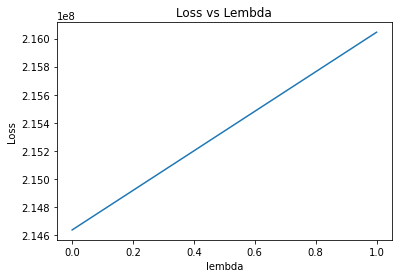

In [11]:
f=plt.figure()
plt.ylabel("Loss")
plt.xlabel("lembda")
plt.title("Loss vs Lembda")


lemda_=[1,0.5,0.3,0.1,0.01,0.001,0.0001,0.00001,0]
loss_=[costFunctionWithRegularization(x_valid,y_valid,w2,l) for l in lemda_]
print(loss_)
plt.plot(lemda_,loss_)
plt.show()

# Comparing  performances in terms of % error in prediction
**error1 : error in prediction (Predictor:without regularization)\
error2 : error in prediction (Predictor:with regularization)**
\begin{equation}
    \frac{error1-error2}{error1} \times 100
\end{equation}

In [12]:
def percentageError(err1,err2):
    p_err =  ((err1-err2)*100)/err1
    p_err = np.round(p_err,3)
    if p_err<0:
        print("Error1 < Error2 by",-p_err,"%\n")
    elif p_err==0:
        print("Error1 == Error\n")
    else:
        print("Error1 > than Error2 :",p_err,"%\n")

print("Error1 : Error without Regularization")
print("Error2 : Error with Regularization\n")


print("At lembda = ",0.1)
err_w1 = costFunction(x_valid,y_valid,w1)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.1)
percentageError(err_w2,err_w1)

print("At lembda = ",0.01)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.01)
percentageError(err_w2,err_w1)

print("At lembda = ",0.001)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.001)
percentageError(err_w2,err_w1)

print("At lembda = ",0.0001)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.0001)
percentageError(err_w2,err_w1)

print("At lembda = ",0)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0)
percentageError(err_w2,err_w1)


Error1 : Error without Regularization
Error2 : Error with Regularization

At lembda =  0.1
Error1 > than Error2 : 0.063 %

At lembda =  0.01
Error1 > than Error2 : 0.004 %

At lembda =  0.001
Error1 < Error2 by 0.002 %

At lembda =  0.0001
Error1 < Error2 by 0.003 %

At lembda =  0
Error1 < Error2 by 0.003 %



# Testing with new hypothesis function

### Hypothesis and cost function 
\begin{equation}
Hypothesis :  h_w(x) = w_0 + w_1x_1 + w_2x_2 + w_3x_2^2 + w_4x_2^3 + w_5x_3 + w_6x_3^2 \
\end{equation}

\begin{equation}
Cost function(without regularization) : J(w) = \frac{1}{2m} \sum_{i=1}^{i=m} (h_w(x)-y^{(i)})^2
\end{equation}

\begin{equation}
Cost function(with regularization) : J(w) = \frac{1}{2m} [\sum_{i=1}^{i=m} (h_w(x)-y^{(i)})^2  + \lambda \sum_{j=1}^{j=n} w_j^2]
\end{equation}



In [13]:
#changing dataset according to new hypothesis
m,n = x_train.shape
x_train_new = np.ones((m,n+3))
x_train_new[:,0:3] = x_train[:,0:3]                     # w0 + w1x1 + w2x2
x_train_new[:,3:4] = x_train[:,2:3]**2                  # w0 + w1x1 + w2x2 + w3(x2)^2
x_train_new[:,4:5] = x_train_new[:,3:4]*x_train[:,2:3]  # w0 + w1x1 + w2x2 + w3(x2)^2 + w4(x2)^3 
x_train_new[:,5:6] = x_train[:,3:4]                     # w0 + w1x1 + w2x2 + w3(x2)^2 + w4(x2)^3 + w5x3
x_train_new[:,6:] =  x_train[:,3:4]**2                  # w0 + w1x1 + w2x2 + w3(x2)^2 + w4(x2)^3 + w5x3 + w5(x3)^2
y_train_new = y_train

m,n = x_valid.shape
x_valid_new = np.ones((m,n+3))
x_valid_new[:,0:3] = x_valid[:,0:3]                     
x_valid_new[:,3:4] = x_valid[:,2:3]**2              
x_valid_new[:,4:5] = x_valid_new[:,3:4]*x_valid[:,2:3] 
x_valid_new[:,5:6] = x_valid[:,3:4]                     
x_valid_new[:,6:] =  x_valid[:,3:4]**2 
y_valid_new = y_valid
print(x_train[:5])
print(x_train_new[:5])

[[   1 7700    3    2]
 [   1 2610    3    1]
 [   1 5900    4    2]
 [   1 4500    2    1]
 [   1 7000    3    1]]
[[1.00e+00 7.70e+03 3.00e+00 9.00e+00 2.70e+01 2.00e+00 4.00e+00]
 [1.00e+00 2.61e+03 3.00e+00 9.00e+00 2.70e+01 1.00e+00 1.00e+00]
 [1.00e+00 5.90e+03 4.00e+00 1.60e+01 6.40e+01 2.00e+00 4.00e+00]
 [1.00e+00 4.50e+03 2.00e+00 4.00e+00 8.00e+00 1.00e+00 1.00e+00]
 [1.00e+00 7.00e+03 3.00e+00 9.00e+00 2.70e+01 1.00e+00 1.00e+00]]


vector w1_new 
 [[-6.81803859e+04]
 [ 5.57131312e+00]
 [ 5.27768368e+04]
 [-1.07348850e+04]
 [ 6.39992728e+02]
 [ 2.71685381e+04]
 [-2.13323475e+03]]

Loss using w1_new(without regularization) : 214433987.46726775
vector w2_new:
 [[-5.38569983e+04]
 [ 5.57224585e+00]
 [ 3.98989729e+04]
 [-6.76061099e+03]
 [ 2.57121408e+02]
 [ 2.54163071e+04]
 [-1.63671498e+03]]

lembda= 0.1 Loss using w2_new(with regularization)  215341659.69940767


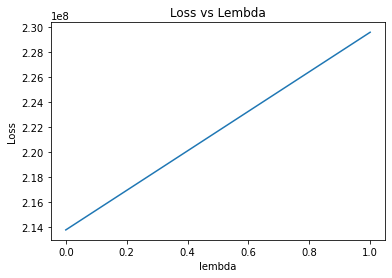

In [14]:
#generating output for hypothes
w1_new =normalEquation(x_train_new,y_train_new)
print("vector w1_new \n",w1_new,end="\n\n")
print("Loss using w1_new(without regularization) :",costFunction(x_valid_new,y_valid,w1_new))

lembda = 0.1
w2_new =normalEquationWithRegularization(x_train_new,y_train_new,lembda)
print("vector w2_new:\n",w2_new,end="\n\n")
print("lembda=",lembda,"Loss using w2_new(with regularization) ",costFunctionWithRegularization(x_valid_new,y_valid,w2_new,lembda))

f=plt.figure()
plt.ylabel("Loss")
plt.xlabel("lembda")
plt.title("Loss vs Lembda")
#[plt.scatter(l,costFunctionWithRegularization(x_valid,y_valid,w2,l),color="red") for l in ld]
#plt.show()
lemda_=[1,0.5,0.3,0.1,0.01,0.001,0.0001,0.00001,0]
loss_=[costFunctionWithRegularization(x_valid_new,y_valid_new,w2_new,l) for l in lemda_]
plt.plot(lemda_,loss_)
plt.show()



# Comparing performance for new Hypothesis
**error1 : error in prediction (Predictor:without regularization)\
error2 : error in prediction (Predictor:with regularization)**
\begin{equation}
    \frac{error1-error2}{error1} \times 100
\end{equation}

In [ ]:
def percentageError(err1,err2):
    p_err =  ((err1-err2)*100)/err1
    p_err = np.round(p_err,3)
    if p_err<0:
        print("Error1 < Error2 by",-p_err,3,"%\n")
    elif p_err==0:
        print("Error1 == Error\n")
    else:
        print("Error1 > than Error2 :",p_err,"%\n")

print("Error1 : Error without Regularization")
print("Error2 : Error with Regularization\n")


print("At lembda = ",0.1)
err_w1 = costFunction(x_valid_new,y_valid_new,w1_new)
err_w2 = costFunctionWithRegularization(x_valid_new,y_valid,w2_new,lembda=0.1)
percentageError(err_w2,err_w1)

print("At lembda = ",0.01)
err_w2 = costFunctionWithRegularization(x_valid_new,y_valid,w2_new,lembda=0.01)
percentageError(err_w2,err_w1)

print("At lembda = ",0.001)
err_w2 = costFunctionWithRegularization(x_valid_new,y_valid,w2_new,lembda=0.001)
percentageError(err_w2,err_w1)

print("At lembda = ",0.0001)
err_w2 = costFunctionWithRegularization(x_valid_new,y_valid,w2_new,lembda=0.0001)
percentageError(err_w2,err_w1)


## Analysis :
<ul>
    <li>Percentage Error without Regularization > Error with Regularization.</li>
    <li>decreasing $\lambda$ decreases the difference between error in prediction decreases.</li>
    <li>At $\lambda$ = 0 Errors with or without regularization is same.</li>
    <li>With Regularization , while $\lambda$ increases loss/error also increasess(from plot).</li>
</ul>